# RNN 이론

기존 신경망의 한계 : Sequence data를 처리하기 어려움
<br>

Sequence data : 데이터 집합 내의 객체들이 어떤 순서를 가진 데이터 (ex. 음성신호, 자연어 문장)
<br>

기존 신경망은 순서를 인식하지 못한다
→ 상당히 딥러닝으로 학습하기에는 어려움이 있었다

Sequence data를 처리하기 위해 RNN(Recurrent Neural Network)은? <br>
<b> 이전 출력값이 현재 결과에 영향을 미침. </b>
→ x1이 x2의 input에 영향을 끼친다!

* cell이란?
각각의 상태(state)에서의 RNN 모델을 의미함

In [ ]:
# hidden size : output size
# cell을 불러옴. 
cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)

# input : cell, x_data(문장)
# _ : 아무것도 사용하지 않겠다
output, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)

# RNN basics

* hidden size = output dimension
각 RNN cell을 거치고 나온 output을 표현하는 벡터의 차원을 의미함 (하이퍼 파라미터)
<br>

hidden size = 2 : output_shape = (1,1,2), states shape = (1,2) <br>
hidden size = 3 : output_shape = (1,1,3), states shape = (1,3)

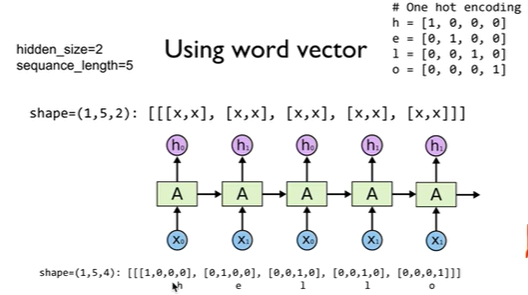

In [1]:
import tensorflow as tf
import numpy as np
import pprint

D:\jeewo\anaconda3\envs\tensorflow_1.13.1\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\jeewo\anaconda3\envs\tensorflow_1.13.1\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\jeewo\anaconda3\envs\tensorflow_1.13.1\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\jeewo\anaconda3\envs\tensorflow_1.13.1\lib\site-pack

In [ ]:
pp = pprint.PrettyPrinter(indent=4)
sess = tf.InteractiveSession()

# one hot encoding for hello
h = [1,0,0,0]
e = [0,1,0,0]
l = [0,0,1,0]
o = [0,0,0,1]

hidden_size = 2 
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size)
x_data = np.array([[h,e,l,l,o]], dtype=np.float32)
print('x_data shape :',x_data.shape)
pp.pprint(x_data)

outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
sess.run(tf.global_variables_initializer())
pp.pprint(outputs.eval())

In [ ]:
outputs

In [ ]:
_states

* hidden_size = 2
* sequence_length = 5
* batch = 3

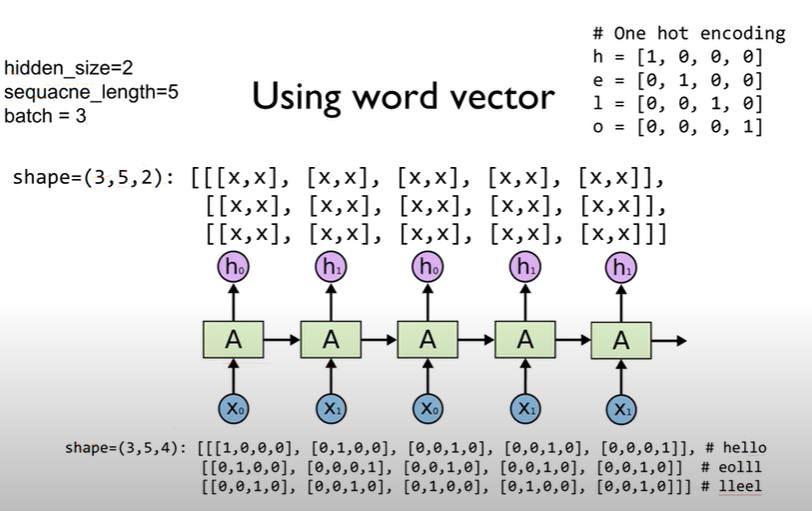

# character sequence RNN

In [2]:
tf.set_random_seed(777)

# one-hot encoding 정의
sample = " if you want you"
idx2char = list(set(sample))
char2idx = {c:i for i,c in enumerate(idx2char)}

# hyper parameters
dic_size = len(char2idx) # RNN input size
hidden_size = len(char2idx) # RNN output size
num_classes = len(char2idx) # final output size
batch_size = 1
sequence_length = len(sample) - 1 # number of lstm rolligns
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample] # char to index
x_data = [sample_idx[:-1]]  # X data sample (0~ n-1) hello : hell
y_data = [sample_idx[1:]] # Y label sample (1~n) hello : ello

In [9]:
X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])
x_one_hot = tf.one_hot(X, num_classes)

outputs = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size)

In [10]:
# FC layer - classifier
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, activation_fn=None)

outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weigths = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimzier(learning_rate=learning_rate).minimize(loss)

prediciton = tf.argmax(outputs, axis=2)

TypeError: Failed to convert object of type <class 'tensorflow.python.ops.rnn_cell_impl.BasicLSTMCell'> to Tensor. Contents: <tensorflow.python.ops.rnn_cell_impl.BasicLSTMCell object at 0x00000221D358E248>. Consider casting elements to a supported type.

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l,_ = sess.run([loss, train], feed_dict = {X:x_data, Y:y_data})
        result = sess.run(prediction, feed_dict={X:x_data})
        
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print(i,'loss:',l,"Prediction:",''.join(result_str))

NameError: name 'loss' is not defined